In [1]:
import pandas as pd
import numpy as np

In [2]:
gentrification = pd.read_csv('2009_ACS_normalized_data.csv', encoding='utf-8')

In [3]:
gentrification.columns.size

494

In [4]:
gentrification.shape

(613, 494)

In [124]:
list(gentrification.columns.unique())

['Geography',
 'GENTRIFIED',
 'ACS_09_B08303_HD01_VD01_Estimate; Total:_100scale',
 'ACS_09_B08303_HD01_VD02_Estimate; Less than 5 minutes_100scale',
 'ACS_09_B08303_HD01_VD03_Estimate; 5 to 9 minutes_100scale',
 'ACS_09_B08303_HD01_VD04_Estimate; 10 to 14 minutes_100scale',
 'ACS_09_B08303_HD01_VD05_Estimate; 15 to 19 minutes_100scale',
 'ACS_09_B08303_HD01_VD06_Estimate; 20 to 24 minutes_100scale',
 'ACS_09_B08303_HD01_VD07_Estimate; 25 to 29 minutes_100scale',
 'ACS_09_B08303_HD01_VD08_Estimate; 30 to 34 minutes_100scale',
 'ACS_09_B08303_HD01_VD09_Estimate; 35 to 39 minutes_100scale',
 'ACS_09_B08303_HD01_VD10_Estimate; 40 to 44 minutes_100scale',
 'ACS_09_B08303_HD01_VD11_Estimate; 45 to 59 minutes_100scale',
 'ACS_09_B08303_HD01_VD12_Estimate; 60 to 89 minutes_100scale',
 'ACS_09_B08303_HD01_VD13_Estimate; 90 or more minutes_100scale',
 'ACS_09_B12002_HD01_VD01_Estimate; Total:_100scale',
 'ACS_09_B12002_HD01_VD02_Estimate; Male:_100scale',
 'ACS_09_B12002_HD01_VD03_Estimate; Mal

In [11]:
gentrification.columns = [x.strip().replace(' ', '_') for x in gentrification.columns]

In [12]:
gentrification.columns = [x.strip().replace( ';' , '_') for x in gentrification.columns]

In [13]:
gentrification.columns = [x.strip().replace( '-' , '') for x in gentrification.columns]

In [14]:
gentrification.columns = [x.strip().replace( ':' , '') for x in gentrification.columns]

In [15]:
gentrification.columns = [x.strip().replace( '(' , '') and x.strip().replace( ')' , '') for x in gentrification.columns]

In [9]:
gentrification.GENTRIFIED.dtype

dtype('bool')

In [10]:
gentrification.GENTRIFIED = gentrification.GENTRIFIED.apply(lambda x: x.astype(np.int64))

In [17]:
median_features = gentrification.dropna().median()
mean_features = gentrification.dropna().mean()

In [20]:
# imputed_features = gentrification.fillna(median_features)
imputed_mean_features = gentrification.fillna(mean_features)

In [22]:
target = imputed_mean_features.GENTRIFIED.values #target array contains 613 counts

In [28]:
# imputed_mean_features = imputed_features.loc[:, (imputed_features != 0).any(axis=0)]
imputed_mean_features = imputed_mean_features.loc[:, (imputed_mean_features != 0).any(axis=0)]

In [154]:
imputed_features.shape

(613, 494)

In [29]:
imputed_mean_features.drop(imputed_mean_features.columns[[0]], axis=1, inplace=True) #drop Geography column

In [30]:
imputed_mean_features.head(3)

,GENTRIFIED,ACS_09_B08303_HD01_VD01_Estimate__Total_100scale,ACS_09_B08303_HD01_VD02_Estimate__Less_than_5_minutes_100scale,ACS_09_B08303_HD01_VD03_Estimate__5_to_9_minutes_100scale,ACS_09_B08303_HD01_VD04_Estimate__10_to_14_minutes_100scale,ACS_09_B08303_HD01_VD05_Estimate__15_to_19_minutes_100scale,ACS_09_B08303_HD01_VD06_Estimate__20_to_24_minutes_100scale,ACS_09_B08303_HD01_VD07_Estimate__25_to_29_minutes_100scale,ACS_09_B08303_HD01_VD08_Estimate__30_to_34_minutes_100scale,ACS_09_B08303_HD01_VD09_Estimate__35_to_39_minutes_100scale,...,ACS_09_S2201_HC01_EST_VC23_Total__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale,ACS_09_S2201_HC02_EST_VC23_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale,ACS_09_S2201_HC03_EST_VC23_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale,ACS_09_S2201_HC01_EST_VC24_Total__Estimate__WORK_STATUS__Families__1_worker_in_past_12_months_100scale,ACS_09_S2201_HC02_EST_VC24_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__1_worker_in_past_12_months_100scale,ACS_09_S2201_HC03_EST_VC24_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__Families__1_worker_in_past_12_months_100scale,ACS_09_S2201_HC01_EST_VC25_Total__Estimate__WORK_STATUS__Families__2_or_more_workers_in_past_12_months_100scale,ACS_09_S2201_HC02_EST_VC25_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__2_or_more_workers_in_past_12_months_100scale,ACS_09_S2201_HC03_EST_VC25_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__Families__2_or_more_workers_in_past_12_months_100scale,ACS_09_S2201_HC01_EST_VC27_Total__Estimate__PERCENT_IMPUTED__Food_stamp/SNAP_recipiency_100scale
0,0,27.11,13.69,7.53,13.63,14.93,15.25,6.68,20.02,29.18,...,24.36,23.5,21.27,77.86,54.1,65.90,39.14,22.4,41.36,10.99
1,0,14.02,0.00,5.72,0.71,8.69,19.06,7.98,12.56,0.00,...,63.82,63.2,32.55,74.41,32.3,81.17,16.00,4.5,22.55,43.96
2,0,5.35,0.00,11.14,7.79,2.69,4.15,1.60,7.35,3.93,...,0.00,0.0,0.00,60.44,79.3,22.84,66.00,20.7,87.62,65.93


In [31]:
imputed_mean_features = imputed_mean_features.applymap(np.int64)

In [32]:
imputed_mean_features.to_csv("cleaned_mean_imputed_features.csv", encoding='utf-8', index=False)

In [33]:
cleaned_features = pd.read_csv("cleaned_mean_imputed_features.csv", encoding='utf-8')

In [34]:
cleaned_features.to_csv('all_features_mean.txt', encoding='utf-8', header=False, index=False) 

In [35]:
features_array  = cleaned_features.values

In [36]:
target = cleaned_features.GENTRIFIED.values

In [37]:
from sklearn.cross_validation import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
    features_array, target, test_size=0.20, random_state=0)

In [38]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1)
logreg.fit(features_train, target_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [39]:
target_predicted = logreg.predict(features_test)

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_predicted)

0.87804878048780488

In [41]:
logreg.score(features_test, target_test)

0.87804878048780488

In [42]:
feature_names = cleaned_features.columns

In [43]:
feature_names

Index(['GENTRIFIED', 'ACS_09_B08303_HD01_VD01_Estimate__Total_100scale',
       'ACS_09_B08303_HD01_VD02_Estimate__Less_than_5_minutes_100scale',
       'ACS_09_B08303_HD01_VD03_Estimate__5_to_9_minutes_100scale',
       'ACS_09_B08303_HD01_VD04_Estimate__10_to_14_minutes_100scale',
       'ACS_09_B08303_HD01_VD05_Estimate__15_to_19_minutes_100scale',
       'ACS_09_B08303_HD01_VD06_Estimate__20_to_24_minutes_100scale',
       'ACS_09_B08303_HD01_VD07_Estimate__25_to_29_minutes_100scale',
       'ACS_09_B08303_HD01_VD08_Estimate__30_to_34_minutes_100scale',
       'ACS_09_B08303_HD01_VD09_Estimate__35_to_39_minutes_100scale', 
       ...
       'ACS_09_S2201_HC01_EST_VC23_Total__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale',
       'ACS_09_S2201_HC02_EST_VC23_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale',
       'ACS_09_S2201_HC03_EST_VC23_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__F

In [44]:
logreg.coef_

array([[  8.88649603e-34,  -7.83804989e-34,   9.66616050e-34,
          1.26174813e-33,  -1.00995792e-33,  -9.68387321e-34,
         -8.70168294e-34,   1.15234250e-33,  -7.01448331e-34,
         -2.47927222e-33,   9.37211024e-34,   1.31321036e-34,
         -1.59539804e-33,  -4.28335085e-33,  -1.11604440e-33,
         -1.27088701e-33,  -9.93829997e-34,  -5.02765492e-35,
         -4.04018034e-34,   3.67420315e-34,   5.09136886e-34,
         -7.10696433e-33,   8.18409736e-34,   3.37951767e-34,
          1.21468464e-33,   7.29542532e-34,  -7.17391493e-34,
          4.34067359e-34,  -1.52144359e-33,  -7.83797003e-34,
         -9.91413981e-34,  -1.31151165e-33,  -7.38166762e-34,
          1.99452047e-21,  -7.90668646e-35,   1.31680830e-33,
         -2.53090094e-35,   7.30610259e-34,  -1.24653527e-33,
         -3.03602199e-34,  -8.15677477e-34,  -9.18815738e-34,
          3.74615538e-34,  -2.20660225e-33,  -1.12012411e-33,
         -7.27871201e-35,  -3.46347407e-33,  -2.47188928e-33,
        

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, target_predicted)
print(cm)

[[108   2]
 [ 13   0]]


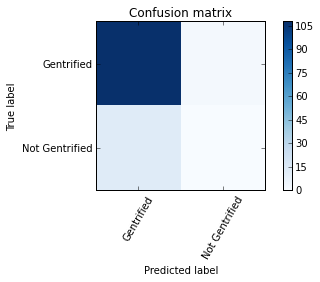

In [47]:
%matplotlib inline

import matplotlib.pyplot as plt

def plot_confusion(cm, target_names = ['Gentrified', 'Not Gentrified'],
                   title='Confusion matrix'):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Convenience function to adjust plot parameters for a clear layout.
    plt.tight_layout()
    
plot_confusion(cm)

In [48]:
cm.sum(axis=1)

array([110,  13])

In [49]:
cm_normalized = cm.astype(np.float64) / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

[[ 0.98181818  0.01818182]
 [ 1.          0.        ]]


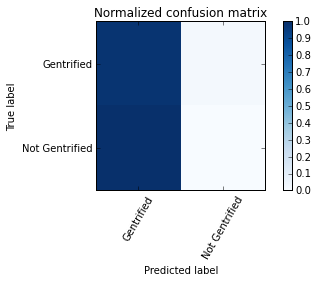

In [50]:
plot_confusion(cm_normalized, title="Normalized confusion matrix")

In [51]:
from sklearn.metrics import classification_report

print(classification_report(target_test, target_predicted,
                            target_names=['Gentrified', 'Not Gentrified']))

                precision    recall  f1-score   support

    Gentrified       0.89      0.98      0.94       110
Not Gentrified       0.00      0.00      0.00        13

   avg / total       0.80      0.88      0.84       123



In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

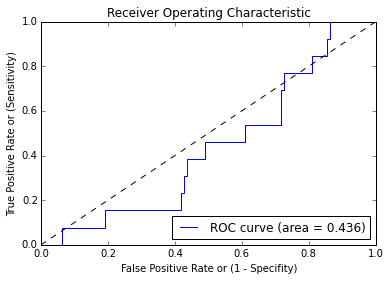

In [53]:
target_predicted_prob = logreg.predict_proba(features_test)
plot_roc_curve(target_test,target_predicted_prob)

In [54]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(logreg, features_array, target, cv=3)

In [55]:
scores

array([ 0.69268293,  0.64215686,  0.88235294])

In [56]:
scores.min(), scores.max(), scores.mean()

(0.64215686274509809, 0.88235294117647056, 0.73906424358361233)

In [57]:
scores = cross_val_score(logreg, features_array, target, cv=3,
                         scoring='roc_auc')
scores.min(), scores.mean(), scores.max()

(0.40098881082487636, 0.47873347053674919, 0.55017386984600103)